In [176]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [177]:
def OLS_L2(y,y_hat,l2,w):
    return (y - y_hat).dot(y - y_hat) + l2*w.T.dot(w)

def OLS_L(y,y_hat):
    return (y - y_hat).dot(y - y_hat)

def R2 (y, y_hat):
    return 1 - OLS(y, y_hat) / OLS(y,y.mean())

In [178]:
N  = 1000

x = np.random.randn(N)

y = 4.53314 + 3.9131*x + np.random.randn(N)

X = np.vstack([np.array([1]*N), x]).T

print(X[:10])
print(y[:10])

[[ 1.         -1.68057948]
 [ 1.          0.11805318]
 [ 1.         -1.68314564]
 [ 1.         -0.1682324 ]
 [ 1.          0.23503481]
 [ 1.          0.36050728]
 [ 1.          0.32595239]
 [ 1.          0.12996457]
 [ 1.          0.54661948]
 [ 1.         -0.33390128]]
[-2.56445691  6.04732003 -2.98220032  4.3956102   6.32688306  4.42568408
  6.01774182  5.1964993   5.11477576  3.72983348]


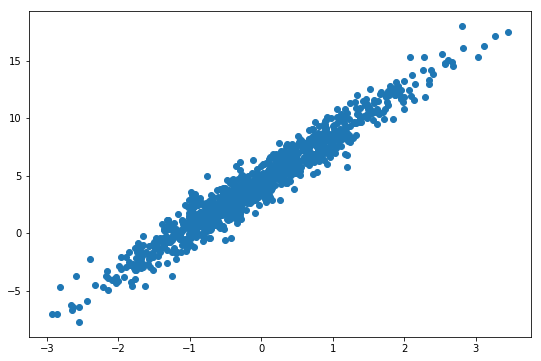

In [179]:
plt.figure(figsize=(9,6))
plt.scatter(x,y)

In [180]:
N = X.shape[0]

np.random.seed(101)

idx = np.random.permutation(N)

X = X[idx,:]
y = y[idx]

X_train = X[:int(0.6*N),:]
y_train = y[:int(0.6*N)]

X_cv = X[int(0.6*N):int(0.8*N),:]
y_cv = y[int(0.6*N):int(0.8*N)]

x_test = X[int(0.8*N):,:]
y_test = y[int(0.8*N):]



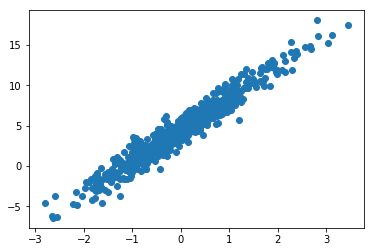

In [181]:
plt.scatter(X_train[:,1],y_train)

In [182]:
#for example purpose we want to mess up some for our test data

y_train[1:20] +=30

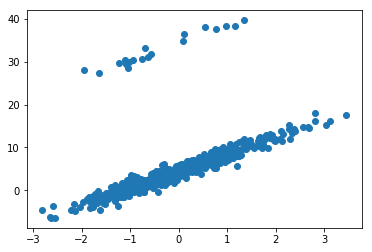

In [183]:
plt.scatter(X_train[:,1],y_train)

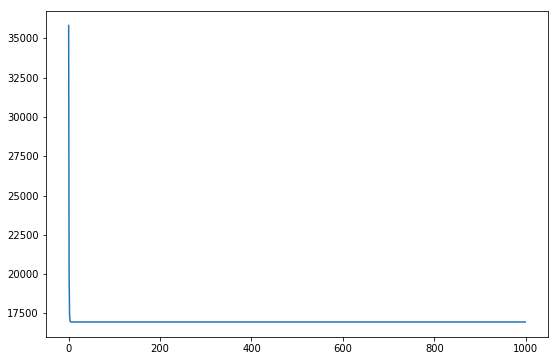

In [184]:
w = np.random.randn(X.shape[1])
J = []
eta = 1e-3

epochs = int(1e3)

for i in range (epochs):
    y_hat_train = X_train.dot(w)
    J.append(OLS_L(y_train,y_hat_train))
    w -= eta* (X_train.T.dot(y_hat_train - y_train))
    
plt.figure(figsize=(9,6))
plt.plot(J)

In [185]:
N_train = X_train.shape[0]
N_cv = X_cv.shape[0]

J_train = (1/N_train) * OLS_L(y_train,y_hat_train)

y_hat_cv = X_cv.dot(w)

J_cv = (1/N_cv) * OLS_L(y_cv,y_hat_cv)

print("Traidn Error: {}".format(J_train))
print("Traidn Error: {}".format(J_cv))



Traidn Error: 28.252038928214997
Traidn Error: 1.9701518573981092


In [189]:
for l2 in range(100):
    
    w = np.random.randn(X.shape[1])
    
    eta = 1e-3
    epochs = int(1e3)
    
    for t in range (epochs):
        y_hat_train = X_train.dot(w)
        #w -= eta* (X_train.T.dot(y_hat_train - y_train))

        w -= eta*(X_train.T.dot(y_hat_train - y_train) + l2*w)
        
    y_hat_cv = X_cv.dot(w)
    
    J_train = (1/N_train)* OLS_L(y_train,y_hat_train)
    J_cv = (1/N_cv) * OLS_L(y_cv,y_hat_cv)

    #cv.append((J_train,J_cv, l2))